<a href="https://colab.research.google.com/github/Vkshah20/Intel-Image-Classification/blob/master/Intel_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import  Callback, TensorBoard, LearningRateScheduler
from tensorflow.keras import metrics 
from tensorflow import summary, math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from zipfile import ZipFile
# Create a ZipFile Object and load sample.zip in it
with ZipFile('drive/My Drive/DATA.zip', 'r') as zipObj:
    zipObj.extractall()

In [3]:
class MyCall(Callback):
    def on_epoch_end(self, epochIndex, logs={}):
        if(logs['acc'] > 0.95):
            self.model.stop_training = True
        if(np.abs(logs['acc'] - logs['val_acc']) > 0.025 and epochIndex > 10):
            self.model.stop_training = True
        

def lrCallBack(epoch):
    if epoch == 0 :
        return 0.001
    lr = 0.001
    k = 0.1
    newLr = lr * (1 / np.sqrt(epoch))
    summary.scalar(name = 'Learning Rate', data = newLr, step = epoch)
    return newLr

lrCall = LearningRateScheduler(lrCallBack)
calls = MyCall()
tbCall = TensorBoard('logs', histogram_freq = 1)


In [4]:
trainP = 'DATA/seg_train'
testP = 'DATA/seg_test'

trainDataGen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    zoom_range=0.2,)
testDataGen = ImageDataGenerator(rescale = 1./255)

trainGen = trainDataGen.flow_from_directory(
    trainP,
    target_size = (150,150),
    batch_size = 64,
    class_mode = 'categorical')

testGen = testDataGen.flow_from_directory(
    testP,
    target_size = (150,150),
    batch_size = 64,
    class_mode = 'categorical')



Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3,3), input_shape = (150,150, 3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(1024, activation = 'relu'),
    Dropout(0.5),
    Dense(128, activation = 'relu'),
    Dense(6, activation = 'softmax'),
    ])
model.compile('adam', 'categorical_crossentropy', ['acc', metrics.MeanSquaredError(), metrics.Precision(),  metrics.Recall()])


In [8]:
model.fit_generator(
    trainGen,
    epochs = 100,
    callbacks = [calls, tbCall,lrCall],
    validation_data = testGen,)
model.save('kaggle.hdf5')


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
  1/220 [..............................] - ETA: 0s - loss: 1.7779 - acc: 0.2188 - mean_squared_error: 0.1381 - precision: 0.0000e+00 - recall: 0.0000e+00WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
220/220 [==============================] - 78s 354ms/step - loss: 1.2184 - acc: 0.5016 - mean_squared_error: 0.1019 - precision: 0.6905 - recall: 0.2902 - val_loss: 1.0822 - val_acc: 0.5687 - val_mean_squared_error: 0.0906 - val_precision: 0.6770 - val_recall: 0.4813
Epoch 2/100
220/220 [==============================] - 78s 354ms/step - loss: 0.9622 - acc: 0.6302 - mean_squared_error: 0.0823 - precision: 0.7376 - recall: 0.4777 - val_loss: 0.9581 - val_acc: 0.6523 - val_mean_

In [14]:
from google.colab import files
!zip -r logs.zip logs
files.download('logs.zip')

updating: logs/ (stored 0%)
updating: logs/train/ (stored 0%)
updating: logs/train/plugins/ (stored 0%)
updating: logs/train/plugins/profile/ (stored 0%)
updating: logs/train/plugins/profile/2020_09_17_12_53_39/ (stored 0%)
updating: logs/train/plugins/profile/2020_09_17_12_53_39/a0375cdf3e92.trace.json.gz (deflated 0%)
updating: logs/train/plugins/profile/2020_09_17_12_53_39/a0375cdf3e92.input_pipeline.pb (deflated 56%)
updating: logs/train/plugins/profile/2020_09_17_12_53_39/a0375cdf3e92.memory_profile.json.gz (stored 0%)
updating: logs/train/plugins/profile/2020_09_17_12_53_39/a0375cdf3e92.xplane.pb (deflated 81%)
updating: logs/train/plugins/profile/2020_09_17_12_53_39/a0375cdf3e92.tensorflow_stats.pb (deflated 76%)
updating: logs/train/plugins/profile/2020_09_17_12_53_39/a0375cdf3e92.overview_page.pb (deflated 60%)
updating: logs/train/plugins/profile/2020_09_17_12_53_39/a0375cdf3e92.kernel_stats.pb (deflated 93%)
updating: logs/train/events.out.tfevents.1600347215.a0375cdf3e92.14

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
!cp -r kaggle.hdf5 '/content/drive/My Drive/'

In [15]:
predictP = 'DATA/seg_pred'

predGen = testDataGen.flow_from_directory(
    testP,
    target_size = (150,150),
    batch_size = 64,
    class_mode = 'categorical')

history = model.evaluate(predGen)
print(history)

Found 3000 images belonging to 6 classes.
47/47 [==============================] - 5s 99ms/step - loss: 0.5318 - acc: 0.8147 - mean_squared_error: 0.0453 - precision: 0.8375 - recall: 0.7970
[0.5318471193313599, 0.8146666884422302, 0.04534135013818741, 0.8374781012535095, 0.796999990940094]


In [13]:
evalution = testDataGen.flow_from_directory(
    trainP,
    target_size = (150, 150),
    batch_size = 64,
    class_mode = 'categorical'
)

Found 14034 images belonging to 6 classes.


In [15]:
trueLable = []
predictionLable = []
for i in range (218):
    X, y = evalution.next()
    trueLable.append(np.argmax(y, axis = -1))
    predictionLable.append(np.argmax(model.predict(X), axis = -1))

trueLable = np.array(trueLable)
predictionLable = np.array(predictionLable)
trueLable = trueLable.reshape(-1)
predictionLable = predictionLable.reshape(-1)

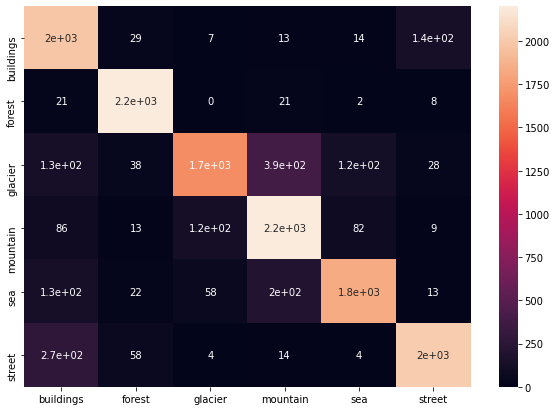

In [36]:
import seaborn as sns
import pandas as pd

matrix = math.confusion_matrix(trueLable, predictionLable)
matrix = np.array(matrix)
label = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
df = pd.DataFrame(matrix, index = label, columns = label)
plt.figure(figsize = (10,7))
sns.heatmap(df, annot = True)
